In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [88]:
# Read the file
with open('housing-data.txt', 'r') as file:
    content = file.readlines()

# Extract column names from the first row
column_names = content[0].strip().split(',')

# Create a list of dictionaries for each row (excluding the first row)
data = []
for line in content[1:]:

    # Split the line into columns
    columns = line.strip().split(',')

    # Create a dictionary for the row
    row = {}
    for i, col_name in enumerate(column_names): 

        # Convert column value to numeric type
        row[col_name] = pd.to_numeric(columns[i])
        
    # Add the row to the data list
    data.append(row)

# Create the DataFrame
df = pd.DataFrame(data)
df.head()


,size,price
0,30.0,75.760161
1,31.0,81.662679
2,32.0,60.944950
3,33.0,67.890597
4,34.0,87.957014


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    200 non-null    float64
 1   price   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


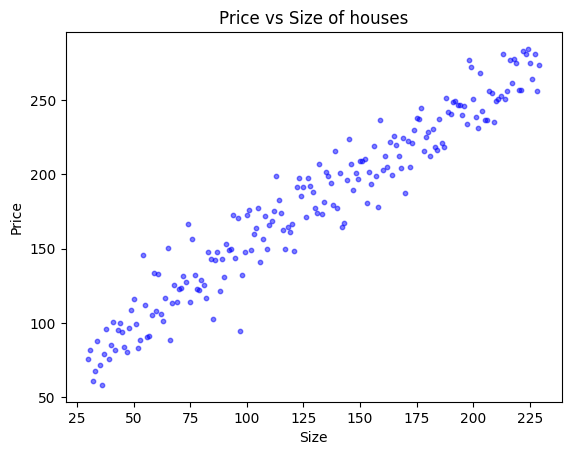

In [90]:
plt.scatter(df['size'], df['price'], s=10, c='b', marker='o', alpha=0.5)
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Price vs Size of houses')
plt.show()

### Implement the "compute_cost" function:

In [91]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    square_err = (predictions - y) ** 2
    return 1 / (2 * m) * np.sum(square_err)


### let's calculate the cost with theta as [0, 0]:

In [92]:
df['ones'] = 1
X = df[['ones', 'size']].values
y = df['price'].values
theta = np.array([0.0, 0.0])
cost = compute_cost(X, y, theta)
print(f"Cost: {cost}")

Cost: 17840.780961229346


### implement the gradient_descent function:


In [93]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []

    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(), (predictions - y))
        descent = alpha * 1/m * error
        theta -= descent
        J_history.append(compute_cost(X, y, theta))

    return theta, J_history


### Create a plot of the values of $J(\theta)$ that compute_costs has found.


The plot of J(θ) values should ideally show a downward trend, steadily decreasing and eventually flattening out when the algorithm has converged to the optimal theta values.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18348\57916545.py:4: RuntimeWarning: overflow encountered in square
  square_err = (predictions - y) ** 2
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18348\1008353876.py:9: RuntimeWarning: invalid value encountered in subtract
  theta -= descent


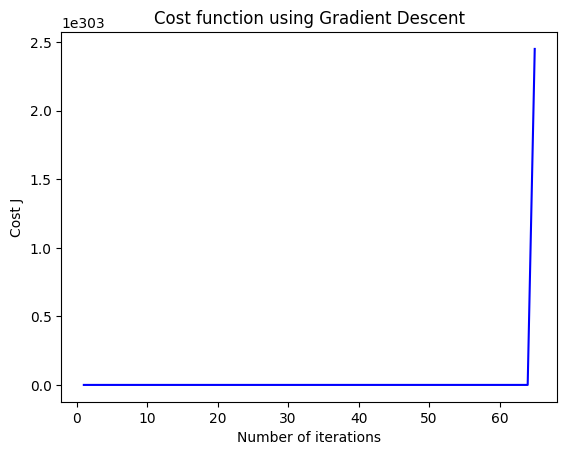

In [94]:
alpha = 0.01
num_iters = 1000

theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)

plt.plot(range(1, num_iters + 1), J_history, color='blue')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Cost function using Gradient Descent')
plt.show()



Bu we're not seeing this.
The cost is increasing.
it is suggested the learning rate is too high and the gradient descent algorithm is overshooting the minimum.

When the learning rate is high, the algorithm takes larger steps down the cost function and might not only miss the minimum but also end up at a point where the cost is higher, leading to divergence.

Try reducing the learning rate (α) and see if the algorithm starts to converge.

In [95]:
print(J_history)

[700355874.3250791, 28026364670693.152, 1.1215405272126843e+18, 4.488106713001545e+22, 1.7960208640297927e+27, 7.18719752069588e+31, 2.876125174046983e+36, 1.1509487519950426e+41, 4.6057906021349884e+45, 1.843114824525772e+50, 7.37565501742952e+54, 2.951540848798191e+59, 1.1811280979842263e+64, 4.726560313118751e+68, 1.8914436488029076e+73, 7.569054110379599e+77, 3.028934018843937e+82, 1.2120987849629694e+87, 4.850496760142219e+91, 1.9410397165664133e+96, 7.767524374509122e+100, 3.108356536636019e+105, 1.2438815629025251e+110, 4.977682979068131e+114, 1.9919362565587152e+119, 7.971198782402084e+123, 3.1898616142637364e+128, 1.2764977258648914e+133, 5.1082041830655965e+137, 2.0441673688223007e+142, 8.18021379335343e+146, 3.273503859105322e+151, 1.3099691262695643e+156, 5.2421478197018224e+160, 2.0977680475463153e+165, 8.394709444795075e+169, 3.3593393104141927e+174, 1.3443181895343825e+179, 5.379603629530893e+183, 2.152774204512226e+188, 8.614829446119209e+192, 3.4474254768645474e+197, 1

It appears that the cost function values (J_history) contain inf and nan values. There are some reasons:

1- The learning rate:
earning rate that's too high. This can cause the gradient descent algorithm to take too large a step, causing numerical instability and resulting in nan values. 


2- Data Scaling: Gradient Descent is sensitive to the scale of the features.
So i seems so important to normalize the data first and then try again.

In [96]:
df['size'] = (df['size'] - df['size'].mean()) / df['size'].std()
df['price'] = (df['price'] - df['price'].mean()) / df['price'].std()
df['ones'] = 1
X = df[['ones', 'size']].values
y = df['price'].values
theta = np.array([0.0, 0.0])
cost = compute_cost(X, y, theta)
print(f"Cost: {cost}")

Cost: 0.4975


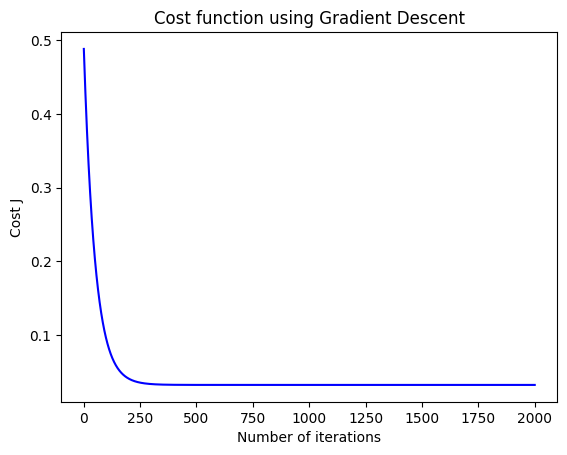

In [97]:
alpha = 0.01 # decrease learning rate
num_iters = 2000 # you can also try increasing the number of iterations

theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)

plt.plot(range(1, num_iters + 1), J_history, color='blue')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Cost function using Gradient Descent')
plt.show()


Finally we can see  J(θ), decreases with each iteration. This decrease represents the algorithm getting "closer" to the optimal parameters for my linear regression model.